<h1 style="color:rgb(0,120,170)"> Decision Trees and Random Forests</h1>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Task 1: Gini Impurity</h2>

In this task we will recall the most important concepts of decision trees by walking you through a simple example. On the way you have to solve some exercises to gain basic insights. We will start with a toy dataset and one tree (which will be extended to a whole forest in the upcoming tasks).
<br> <br>

In [1]:
#Nothing to do here
import numpy as np
import pandas as pd
import sys
import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from Fashion_MNIST_Loader.mnist_loader import MNIST
from evaluate import *
import matplotlib.pyplot as plt
from matplotlib import style
# Set random seed to ensure reproducible runs
RSEED = 50

In [2]:
# A simple data set for demonstration 
# Nothing to do here
X = np.array([[2, 2], 
              [2, 1],
              [2, 3], 
              [1, 2], 
              [1, 1],
              [3, 3]])

y = np.array([0, 1, 1, 1, 0, 1])

Text(0.5, 1.0, 'Demonstration Data')

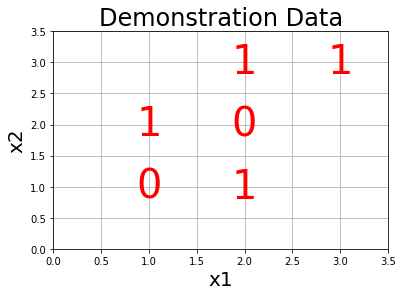

In [3]:
#Nothing to do here. Just execute the command to gain a proper visualization!
%matplotlib inline

# Plot each point as the label
for x1, x2, label in zip(X[:, 0], X[:, 1], y):
    plt.text(x1, x2, str(label), fontsize = 40, color = 'r',
             ha='center', va='center')
    
# Plot formatting
plt.grid(None);
plt.xlim((0, 3.5));
plt.ylim((0, 3.5));
plt.xlabel('x1', size = 20); plt.ylabel('x2', size = 20); plt.title('Demonstration Data', size = 24)

A decision tree classifier (DTC) builds a decision tree based on the features of the data. This is equivalent to subdividing the feature space. Let's consider the example above and apply a simple heuristics. In the first, step we try to subdivide the space such that a maximum of the data points of the same class lie in one division.  
<br>
We first look at the feature $x_2$, i.e. a horizontal division of the space. For example, we could divide the space at the specific threshold $x_2 = 2.5$. Then we end up having a group of samples with features $x_2 > 2.5$ and homogenous class label 1, exactly the two points with coordinates $\{ (2,3), (3,3) \}$. If we instead look at the feature $x_1$, corresponding to a vertical division of the space, we cannot find an equally large or larger group of samples with the same label. Therefore, our first node in the tree is: $x_2 \leq 2.5$, i.e. we split the space into two (see cell below) and repeat the same procedure on each of the two leafs. In our case we are done with the right leaf (since both samples have the same class) and only need to repeat the procedure on the left leaf. Notation: $(x_1,x_2,y)$
<br>
<br>
Note: Install the package "python-graphviz".

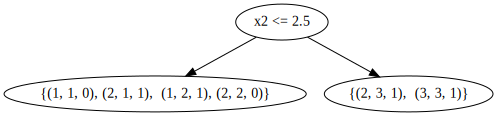

In [4]:
#Nothing to do here. Just execute the command to gain a proper visualization!
from graphviz import Digraph
dot = Digraph()
dot.node('A', 'x2 <= 2.5')
dot.node('B', '{(1,\ 1, 0),\ (2,\ 1, 1), \ (1,\ 2, 1), \(2,\ 2, 0)}')
dot.node('C', '{(2,\ 3, 1), \ (3,\ 3, 1)}')
dot.edges(['AB', 'AC'])
dot

Our simple heuristics from above fails on the left node. We need a better criterion to decide which splits to make. Nowadays the most frequently used one is called the Gini Impurity. 

The Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset [1].
<br>
What does that mean? Let us suppose we have $2$ labels and let $p_1, p_2$ be the fractions of points labeld with labels $1$ and $2$ (note: $p_1 + p_2 = 1$) . The probabilty to choose a point with label $1$ is $p_1$. 
<br>
The probability to choose label $2$ is $p_2 = 1-p_1$. Therefore, the probability to label a point of label $1$ with label $2$ is $p_1 \cdot p_2 = p_1 \cdot (1-p_1) = p_1 - p_1^2$. 
<br>
Analogously, the probability for points with label $2$ to be labeld with $1$ is $p_2 \cdot (1-p_2) = p_2 - p_2^2$. The Gini impurity is the sum over both:

$$p_1 - p_1^2 + p_2 - p_2^2 = p_1 + p_2 - p_1^2 - p_2^2 = 1 - p_1^2 -p_2^2$$

The above reasoning is easy to generalize to the case where the number of labels $J$ is larger then two: $J > 2$ . The formula for the given dataset $Z$ is simply
$$I_G(Z) = 1 - \sum_{j = 1}^J p_j(Z)^2,$$ where $p_j(Z)$ is the frequency of points with labels $j$ in the dataset $Z$. Your task will now be to apply these techniques explicitely to the toy data set introduced above.
<br>
* Calculate the Gini impurity for our toy dataset.
* Calculate the Gini impurity for the left leaf in our split.
* Calculate the Gini impurity for the right leaf in our split.

The Gini impurity Gain is the amount of "impurity" we get rid of for a specific split.
Let's assume we perform a specific split $Z_1, \ldots, Z_k$ of $Z$. Then the impurity gain is
$$g_G(Z) = I_G(Z) - \sum_{j=1}^K \frac{|Z_k|}{|Z|} \cdot I_G(Z_k)$$
* Calculate the Gini information gain for our split in the toy dataset 

What we have seen so far is one decision tree. A forest consists of multiple trees. But every tree is trained on a) a random subset of points and b) a random subset of features. a) is called "bagging" and reduces the variance of the model. b) is called "feature bagging" and is  applied because very few features might be strong predictors for the output - thus, many trees in our forest would be highly correlated which would counteract a). 
<br>
<br>
[1] https://en.wikipedia.org/wiki/Decision_tree_learning

To calculate the Gini impurity for our toy dataset

$$ I_r = 1 - ((\frac{2}{6})^2 + (\frac{4}{6})^2) = 0.444$$

To calculate the Gini impurity for the left leaf 
$$ x2 \le 2.5 \:and\:label == 0 : 2/4 \: instances \:have\: class\: equal\: to\: lable ==0  $$
$$ x2 \le 2.5 \:and\:label == 1 : 2/4 \: instances \:have\: class\: equal\: to\: lable ==1  $$
$$ I_G(Z) = 1 - ((\frac{2}{4})^2 + (\frac{2}{4})^2) = 0.5$$

To calculate the Gini impurity for the right leaf 
$$ x2 > 2.5 \:and\:label == 0 : 0/2 \: instances \:have\: class\: equal\: to\: lable ==0  $$
$$ x2 > 2.5 \:and\:label == 1 : 2/2 \: instances \:have\: class\: equal\: to\: lable ==1  $$
$$ I_G(Z) = 1 - ((\frac{0}{2})^2 + (\frac{2}{2})^2) = 0.0$$

To calculate the Gini information gain for our split in the toy dataset
$$ g_G(Z) = 0.444 - ((\frac{4}{6}\times(0.5))+(\frac{2}{6}\times(0.0)) = 0.111 $$

<h3 style="color:rgb(210,90,80)">Calculation (20 points):</h3>

<h2 style="color:rgb(0,120,170)">Task 2: Train an easy decision tree </h2>

Next we provide a Python routine for the previous example. In the cells below there are code snippets you have to fill in:
* Make a decision tree and train it.
* Print number of tree nodes and the maximum depth of tree. Also print the accuracy.
Of course you are allowed to use the routine from sklearn.

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

In [5]:
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=50, splitter='best')

In [6]:
# print number of tree nodes
print(tree.tree_.node_count)

9


In [7]:
# print maximum depth of tree
print(tree.tree_.max_depth)

3


In [8]:
# print the accuracy 
# Since we did not limit the depth of this tree.

print(f'Model Accuracy: {tree.score(X, y)}')

Model Accuracy: 1.0


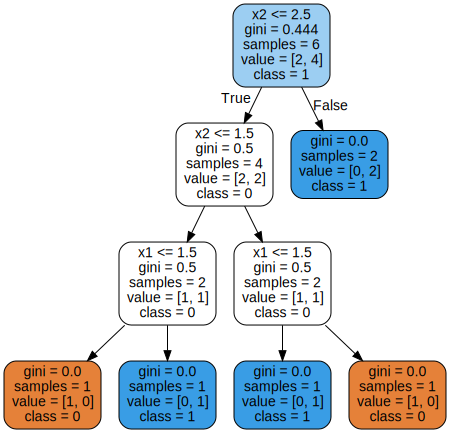

In [9]:
# Visualization of decision tree: Nothing to do here

from sklearn.tree import export_graphviz
# Export as dot
dot_data = export_graphviz(tree, 'tree.dot', rounded = True, 
                feature_names = ['x1', 'x2'], 
                class_names = ['0', '1'], filled = True, impurity = True)

from graphviz import Source
Source.from_file("tree.dot")

<h2 style="color:rgb(0,120,170)">Task 3: Decision tree on a real data set</h2>

Now we intend to apply the different classifiers we have learnt so far to a real-world Benchmark data set, which is often used in applications, namely the "Fashion MNIST" data set. It consits of images of clothing, like sneakers and shirts. It was created to be an alternative to the famous MNIST Benchmark dataset, which is nowadays considered as too easy for the most recent algorithms. Let us first read the train and test set, using the routines and programs provided in moodle. The train and test data are represented as pixel arrays, and the label vector indicates the different classes (0 to 9). Please keep in mind that in order for the next tasks to work you need to save the provided routines in the same folder as the notebook.

In [10]:
print('\nLoading MNIST Data...')
data = MNIST('./Fashion_MNIST_Loader/dataset/')
print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)
#train_mask = np.isin(train_labels, [0,4,5,6])
#train_img,train_labels = train_img[train_mask], train_labels[train_mask]

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)



Loading MNIST Data...

Loading Training Data...

Loading Testing Data...


In [11]:
#Features
X = train_img
#Labels
y = train_labels

Let us plot some of the images so that you see, how these data look like.

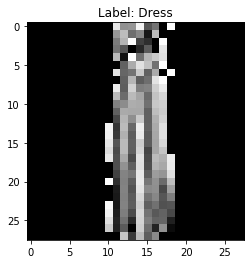

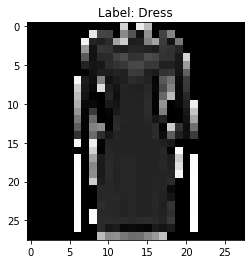

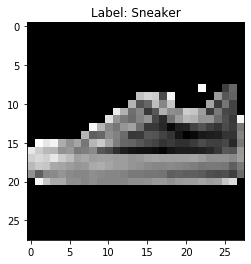

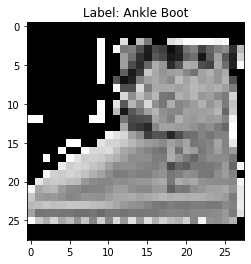

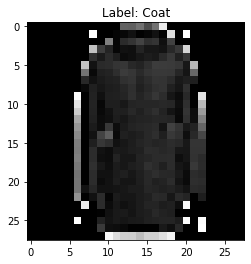

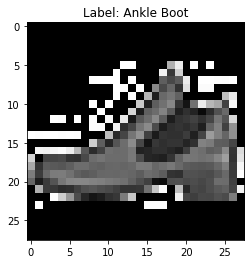

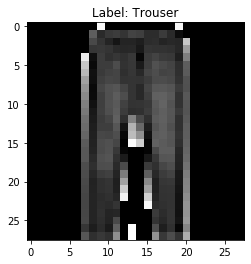

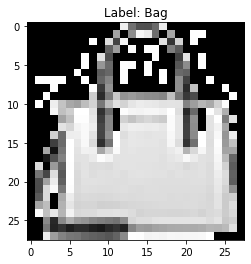

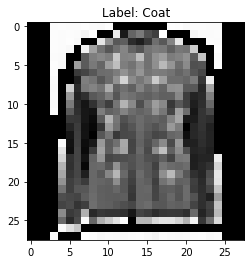

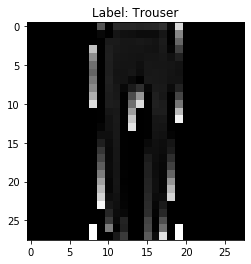

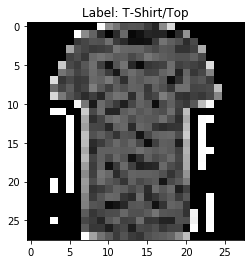

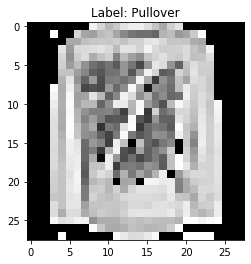

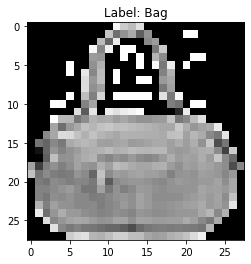

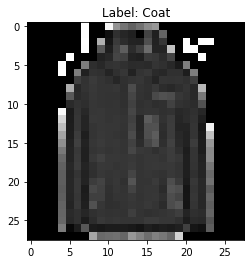

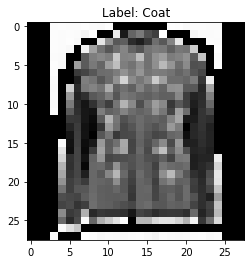

In [12]:
#nothing to do here
arr = ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
a = np.random.randint(1,40,15)
for i in a:
    two_d = (np.reshape(train_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Label: {0}'.format(arr[train_labels[i]]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

Here we provide you a routine that trains a decision tree for the given test set. The given functions get_evaluation_validation and get_evaluation_test should additionally help you to provide confusion matrices and appropriate heat maps for the training and test phase. In the training phase we additionally divide our training set into a validation and training set.


Preparing Classifier Training and Validation Data...

Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

RFC Trained Classifier Confidence:  0.7941666666666667

Predicted Values:  [2 3 4 ... 6 7 4]

Accuracy of Classifier on Validation Image Data:  0.7941666666666667

Confusion Matrix: 
 [[464   4  11  19   8   1  98   2   9   0]
 [  2 580   7  20   3   1   5   0   1   1]
 [  8   2 427   5  79   1  66   0   5   0]
 [ 28  14  15 488  33   1  29   1   9   0]
 [  4   2  76  33 364   0  68   0   7   0]
 [  1   0   2   2   2 535   4  41  12  18]
 [ 93   7  60  26  74   0 326   0  14   1]
 [  0   0   0   0   0  45   0 507   0  39]
 [  5   1   4   5  13   4  15   4 541   1]
 [  0   0   0   1   1  18   2  39   3 533]]

Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Predicted Labels for

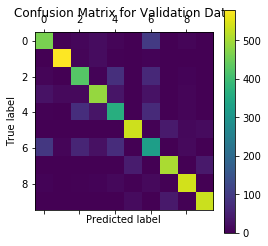

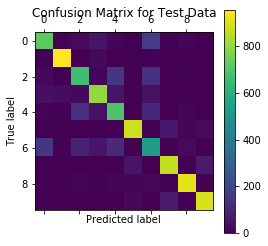

In [13]:
#nothing to do here
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_val, y_train, y_val = model_selection.train_test_split(X,y,test_size=0.1)
model1=DecisionTreeClassifier(criterion="gini",max_depth=50,splitter="best",random_state=RSEED)
model1.fit(X_train,y_train)
get_evaluation_validation(model1, X_val, y_val)
get_evaluation_test(model1, test_img, test_labels)

In order to obtain a better performance, we intend to apply a suitable hyperparameter search. 
* To this end create a parameter grid which iterates over the following quantities: criterion: 'gini' and 'entropy', max_depth: 10,50 and 100, splitter: 'random' and 'best'. 
* Again use a decision tree classifier and grid search with 5 iterations and 3 fold cross validation. 
* Also plot the confusion matrices of the trained and tested model with the best parameters, using the same training, test and validation set as before.

Don't forget to pass the seed. Warning: this may take several minutes ;)

<h3 style="color:rgb(210,90,80)">Code (30 points):</h3>

In [14]:
#your code
from sklearn.model_selection import RandomizedSearchCV

In [15]:
list_max = [10,50,100]


Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

RFC Trained Classifier Confidence:  0.8038333333333333

Predicted Values:  [2 1 6 ... 2 7 6]

Accuracy of Classifier on Validation Image Data:  0.8038333333333333

Confusion Matrix: 
 [[482   2  13  25   9   0  76   1   7   1]
 [  2 568   7  33   5   0   3   0   1   1]
 [  5   0 412   5 127   1  38   0   5   0]
 [ 20   8  11 496  54   0  20   1   8   0]
 [  2   1  41  14 429   1  60   0   6   0]
 [  0   0   1   1   6 526   1  48  13  21]
 [ 96   2  70  19  83   1 317   0  12   1]
 [  0   0   0   0   0  33   0 528   1  29]
 [  5   1  11   4  17   3  18   1 530   3]
 [  0   1   3   1   0  14   0  40   3 535]]

Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [0 1 2 ... 8 8 6]

Accuracy of Classifi

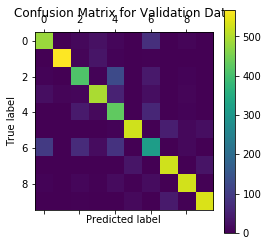

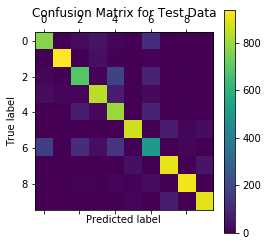

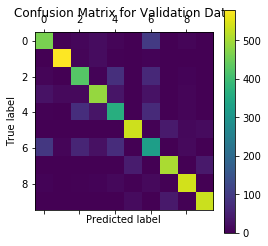

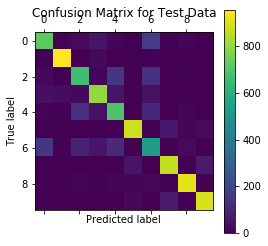

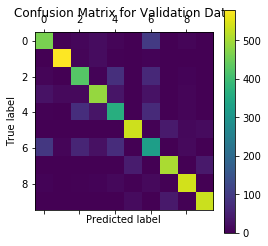

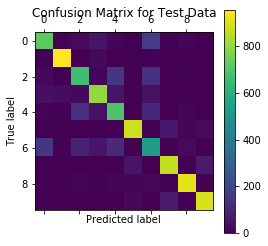

In [16]:
# criterion = "gini" / max_depth="iterations by list_max" / splitter="best"

for i in list_max:
    
    model_gini_best=DecisionTreeClassifier(criterion="gini",max_depth=i,splitter="best",random_state=RSEED)
    model_gini_best.fit(X_train,y_train)
    get_evaluation_validation(model_gini_best, X_val, y_val)
    get_evaluation_test(model_gini_best, test_img, test_labels)
    


Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

RFC Trained Classifier Confidence:  0.819

Predicted Values:  [2 1 6 ... 2 5 0]

Accuracy of Classifier on Validation Image Data:  0.819

Confusion Matrix: 
 [[478   1   7  31   8   0  82   0   8   1]
 [  3 575   5  29   1   0   7   0   0   0]
 [  6   3 444   4  96   0  39   0   0   1]
 [ 20  10  14 522  24   2  23   0   2   1]
 [  2   0  72  31 391   0  54   0   4   0]
 [  1   0   0   1   0 551   0  47   5  12]
 [ 92   3  59  20  78   1 338   1   9   0]
 [  0   0   0   0   0  25   0 517   2  47]
 [  2   0   7   3   8   4  22   4 541   2]
 [  1   0   4   0   1   7   1  24   2 557]]

Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [0 1 2 ... 8 6 2]

Accuracy of Classifier on Test Images:  0.8165

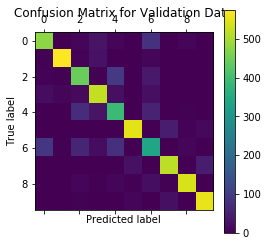

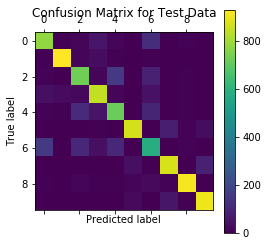

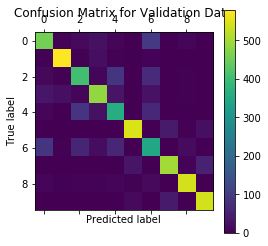

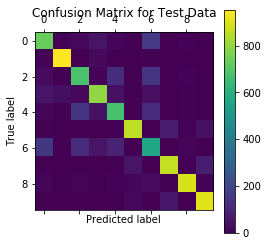

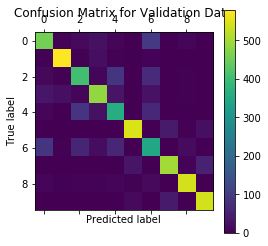

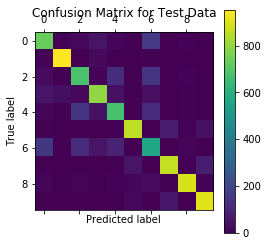

In [17]:
# criterion = "gini" / max_depth="iterations by list_max" / splitter="random"

for i in list_max:
    
    model_gini_random=DecisionTreeClassifier(criterion="gini",max_depth=i,splitter="random",random_state=RSEED)
    model_gini_random.fit(X_train,y_train)
    get_evaluation_validation(model_gini_random, X_val, y_val)
    get_evaluation_test(model_gini_random, test_img, test_labels)
    


Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

RFC Trained Classifier Confidence:  0.8061666666666667

Predicted Values:  [2 3 6 ... 2 7 6]

Accuracy of Classifier on Validation Image Data:  0.8061666666666667

Confusion Matrix: 
 [[498   1  10  17   9   0  69   0  12   0]
 [  4 574   4  29   2   0   5   0   2   0]
 [  4   4 430   5 110   0  31   0   9   0]
 [ 32   9   9 508  43   0  10   0   4   3]
 [  2   1  77  21 380   0  68   0   5   0]
 [  0   1   0   5   1 522   1  60   7  20]
 [120   2  59  20  72   1 311   0  16   0]
 [  0   0   0   0   0  26   0 513   0  52]
 [  5   1   6   5   5   1  12   2 554   2]
 [  1   0   0   0   0  11   5  32   1 547]]

Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [0 1 2 ... 8 8 2]

Accuracy of Classifi

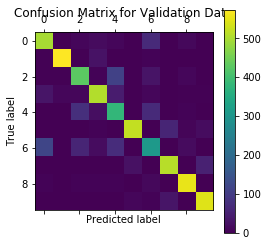

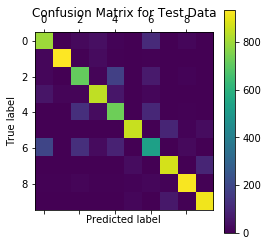

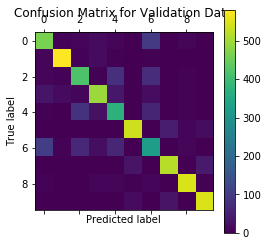

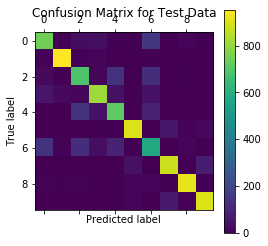

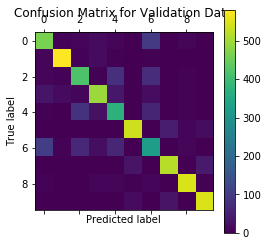

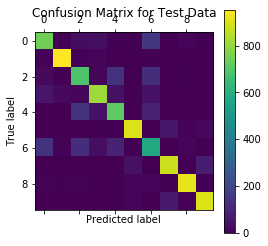

In [18]:
# criterion = "entropy" / max_depth="iterations by list_max" / splitter="best"

for i in list_max:
    
    model_en_best=DecisionTreeClassifier(criterion="entropy",max_depth=i,splitter="best",random_state=RSEED)
    model_en_best.fit(X_train,y_train)
    get_evaluation_validation(model_en_best, X_val, y_val)
    get_evaluation_test(model_en_best, test_img, test_labels)
    


Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

RFC Trained Classifier Confidence:  0.8045

Predicted Values:  [4 1 6 ... 6 9 0]

Accuracy of Classifier on Validation Image Data:  0.8045

Confusion Matrix: 
 [[491   4   9  31   4   2  67   0   8   0]
 [  5 572   3  31   2   0   7   0   0   0]
 [  8   3 435   2 116   1  27   0   1   0]
 [ 32  16  10 503  38   0  13   0   6   0]
 [  2   2  74  28 401   0  42   0   5   0]
 [  0   1   1   0   2 540   1  55   3  14]
 [100   4  78  28  86   0 293   0  12   0]
 [  0   0   0   0   0  34   0 525   0  32]
 [  5   0   9   7  12   8  14   2 533   3]
 [  0   0   1   2   1  11   0  45   3 534]]

Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [0 1 2 ... 8 8 2]

Accuracy of Classifier on Test Images:  0.80

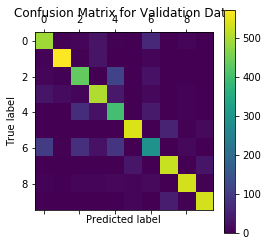

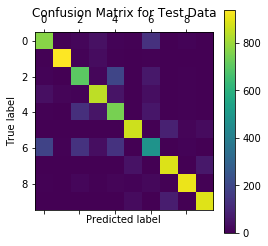

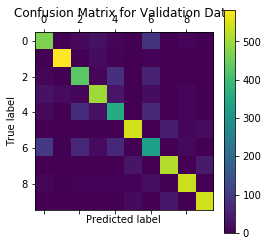

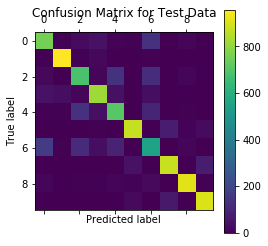

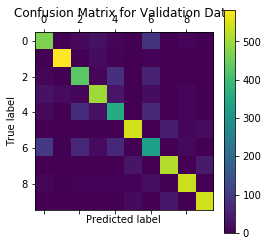

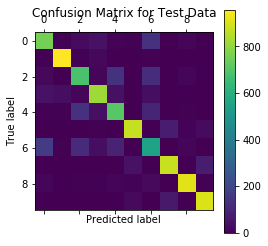

In [19]:
# criterion = "entropy" / max_depth="iterations by list_max" / splitter="random"

for i in list_max:
    
    model_en_random=DecisionTreeClassifier(criterion="entropy",max_depth=i,splitter="random",random_state=RSEED)
    model_en_random.fit(X_train,y_train)
    get_evaluation_validation(model_en_random, X_val, y_val)
    get_evaluation_test(model_en_random, test_img, test_labels)



* Again use a decision tree classifier and grid search with 5 iterations and 3 fold cross validation. 
* Also plot the confusion matrices of the trained and tested model with the best parameters, using the same training, test and validation set as before.

Don't forget to pass the seed. Warning: this may take several minutes ;)


The following code is for the above question. 

In [20]:
param_grid = { 
    'criterion': ["gini","entropy"],
    'max_depth': [10, 50, 100],
    'splitter' : ["best","random"]
    }

In [21]:
clf = DecisionTreeClassifier()

In [22]:
grid_obj = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=5, cv=3, random_state=RSEED)

In [23]:
grid_fit = grid_obj.fit(X_train,y_train)

In [24]:
best_clf = grid_fit.best_estimator_


In [25]:
best_clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

RFC Trained Classifier Confidence:  0.8026666666666666

Predicted Values:  [2 8 6 ... 2 7 0]

Accuracy of Classifier on Validation Image Data:  0.8026666666666666

Confusion Matrix: 
 [[455   5  15  24   6   2  99   0   9   1]
 [  6 578   5  22   3   0   3   0   3   0]
 [  4   4 439   7  68   0  65   0   6   0]
 [ 28  17   9 501  39   0  20   0   3   1]
 [  5   1  92  26 365   0  59   0   6   0]
 [  2   2   1   2   0 537   2  44   8  19]
 [106   4  72  24  58   0 324   0  12   1]
 [  0   0   0   0   0  33   0 521   1  36]
 [  1   2   5   8   6   2  15   3 549   2]
 [  0   0   0   0   0  14   1  33   2 547]]

Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [0 1 2 ... 8 8 2]

Accuracy of Classifi

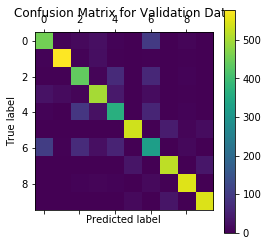

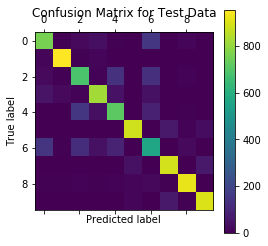

In [26]:
get_evaluation_validation(best_clf, X_val, y_val)
get_evaluation_test(best_clf, test_img, test_labels)

If you did the task correctly, you should obtain a slightly better result than before.

<h2 style="color:rgb(0,120,170)">Task 4: Random forests on a real data set</h2>

Use the RandomForestClassifier with 100 trees, 'entropy' as splitting criterion and max_depth=50. Perform the same steps as above (i.e. print accuracy and plot confusion matrices using the given functions)

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

In [27]:
random_tree = RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=50, random_state=RSEED )

In [28]:
random_forest_fit = random_tree.fit(X_train,y_train)


Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

RFC Trained Classifier Confidence:  0.8881666666666667

Predicted Values:  [2 1 6 ... 2 7 0]

Accuracy of Classifier on Validation Image Data:  0.8881666666666667

Confusion Matrix: 
 [[541   0   6  13   0   0  47   0   9   0]
 [  1 592   4  19   2   0   2   0   0   0]
 [  3   0 513   4  60   0  12   0   1   0]
 [ 14   3   6 562  20   0  13   0   0   0]
 [  1   0  39  16 473   0  23   0   2   0]
 [  0   0   0   0   0 592   0  15   3   7]
 [ 96   1  62  12  55   0 361   0  14   0]
 [  0   0   0   0   0  15   0 551   0  25]
 [  2   0   3   3   4   0   3   0 577   1]
 [  0   0   1   0   0   8   0  20   1 567]]

Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [0 1 2 ... 8 8 2]

Accuracy of Classifi

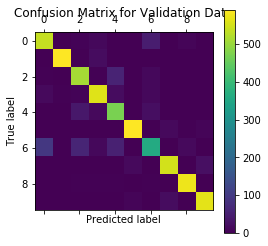

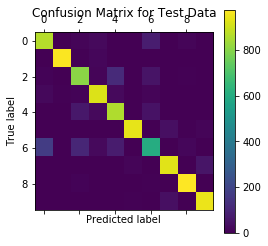

In [29]:
get_evaluation_validation(random_forest_fit, X_val, y_val)
get_evaluation_test(random_forest_fit, test_img, test_labels)

The accuracy should now be much better than by using a single tree classifier. Of course, a suitable hyperparameter search could further improve the result, but we won't pursue this way here, since it may take too long.

<h2 style="color:rgb(0,120,170)">Task 5: Comparison with KNN and SVMs</h2>

In the last task we intend to provide a comparison to the other previously used classifiers, i.e. KNN and SVMs:
* Implement a KNN classifier with n_neighbors = 5, weights = 'distance' and p=1. Do the same tasks as for RF.
* Implement a SVM classifier with C=10, kernel='poly', gamma='auto'. Do the same tasks as for RF.
Again, this may take some time!
Afterward answer some questions that correspond to your observations.

For time reasons you can skip the evaluation on the test set.

<h3 style="color:rgb(210,90,80)">Code (20 points):</h3>

In [30]:
#Your code for KNN

clf_knn = KNeighborsClassifier(n_neighbors=5,weights='distance',p=1)
clf_knn_fit = clf_knn.fit(X_train,y_train)


Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

RFC Trained Classifier Confidence:  0.8616666666666667

Predicted Values:  [2 1 6 ... 2 7 0]

Accuracy of Classifier on Validation Image Data:  0.8616666666666667

Confusion Matrix: 
 [[532   0   6  11   2   0  58   0   7   0]
 [  3 591   2  17   1   0   5   0   0   1]
 [  6   1 477   3  59   0  47   0   0   0]
 [ 20   2   5 544  23   0  23   0   1   0]
 [  2   0  60  13 427   0  52   0   0   0]
 [  0   0   0   0   0 546   0  42   1  28]
 [110   0  64  11  49   0 357   1   9   0]
 [  0   0   0   0   0   7   0 555   0  29]
 [  2   0   6   6   3   1   5   1 568   1]
 [  0   0   0   0   0   3   0  21   0 573]]


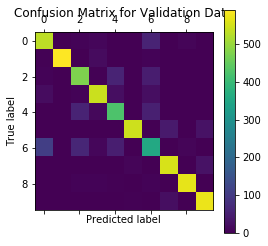

In [31]:
get_evaluation_validation(clf_knn_fit, X_val, y_val)



Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [0 1 2 ... 8 8 2]

Accuracy of Classifier on Test Images:  0.8657

Confusion Matrix for Test Data: 
 [[877   1  13  11   3   0  86   2   7   0]
 [  4 968   7  14   2   0   5   0   0   0]
 [ 13   2 796  10  86   0  92   0   1   0]
 [ 32   9   9 888  36   0  25   0   1   0]
 [  4   0 107  25 787   0  75   0   2   0]
 [  1   0   0   0   0 882   1  70   1  45]
 [200   2 112  20  65   0 596   0   5   0]
 [  0   0   0   0   0   6   0 945   0  49]
 [  4   1  13   1   4   2   8   9 955   3]
 [  0   0   0   0   0   3   0  34   0 963]]


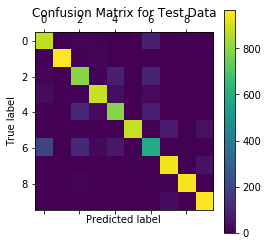

In [35]:
get_evaluation_test(clf_knn_fit, test_img, test_labels)

In [37]:
#Your code for SVM
clf_svc = svm.SVC(C=10, kernel='poly', gamma='auto')
clf_svc_fit = clf_svc.fit(X_train,y_train)


Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

RFC Trained Classifier Confidence:  0.8765

Predicted Values:  [2 1 6 ... 2 5 6]

Accuracy of Classifier on Validation Image Data:  0.8765

Confusion Matrix: 
 [[508   1   6  14   3   0  78   0   6   0]
 [  3 595   1  16   2   0   1   0   1   1]
 [  9   2 505   4  39   0  31   0   2   1]
 [ 24   7  10 537  19   0  21   0   0   0]
 [  0   2  58  26 422   0  41   0   5   0]
 [  0   1   0   2   0 588   1  14   4   7]
 [ 83   2  48  15  35   1 407   0  10   0]
 [  0   0   0   0   0  12   0 556   0  23]
 [  2   1   6   5   0   1   5   1 572   0]
 [  1   0   0   0   0   8   0  18   1 569]]


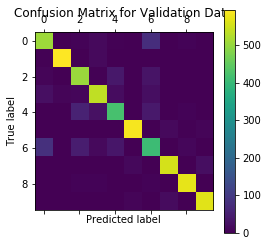

In [38]:
get_evaluation_validation(clf_svc_fit, X_val, y_val)



Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [0 1 2 ... 8 8 1]

Accuracy of Classifier on Test Images:  0.8803

Confusion Matrix for Test Data: 
 [[828   2  25  17   1   1 116   0   8   2]
 [  1 987   0   9   1   0   2   0   0   0]
 [ 23   2 818  15  71   0  66   0   5   0]
 [ 42  18  18 877  20   0  25   0   0   0]
 [  4   1  98  29 807   0  57   0   4   0]
 [  2   0   0   2   0 943   0  32   3  18]
 [132   5  82  33  54   0 682   0  12   0]
 [  0   0   0   0   0  17   0 942   0  41]
 [ 15   0   2   1   1   3  12   2 963   1]
 [  0   0   0   0   0  13   0  30   1 956]]


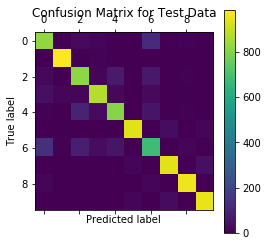

In [39]:
get_evaluation_test(clf_svc_fit, test_img, test_labels)

<h3 style="color:rgb(210,90,80)">Question (10 points):</h3>

What observations can you make so far? Tick the correct boxes (several may be correct):

    
\[  V\]  Random forest is much faster than KNN and SVM in the training phase, and also yields a better accuracy. <br>
\[  \]  Random forest is much faster than KNN and SVM in the training phase, but yields a worse accuracy. <br>
\[  \]  Random forest is slower than KNN and SVM in the training phase, but yields a better accuracy. <br>
\[  V\]  The SVM model yields a better accuray than KNN. <br>
\[  V\] As this is already a large data set, it is no big surprise that a kernel SVM trains very slowly.